In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris



Loading the data

In [25]:
iris= load_iris()

converting Bunch object to dataframe

In [28]:
data = np.c_[iris.data,iris.target]
columns = np.append(iris.feature_names, ["target"])
iris= pd.DataFrame(data, columns=columns)

EDA

In [29]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [30]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [32]:
iris.target.unique()

array([0., 1., 2.])

In [40]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [41]:
iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [44]:
X = iris.iloc[:, 0:-1]
y = iris.iloc[:, -1]

In [46]:
X.shape

(150, 4)

In [47]:
y.shape

(150,)

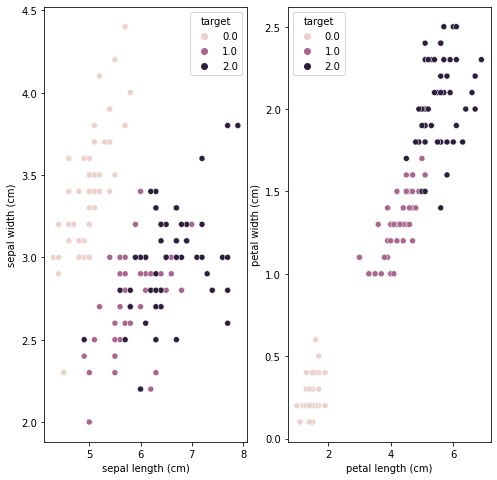

In [78]:
plt.figure(figsize= (8,8))
plt.subplot(1,2,1)
sns.scatterplot(x='sepal length (cm)', y= 'sepal width (cm)', hue='target', data= iris)
plt.subplot(1,2,2)
sns.scatterplot(x='petal length (cm)', y= 'petal width (cm)', hue='target', data= iris)

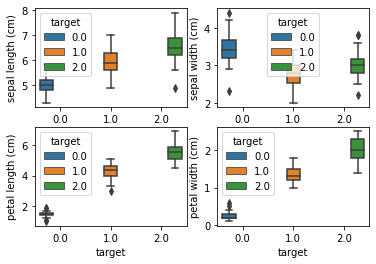

In [64]:
plt.subplot(2,2,1)
sns.boxplot(x="target",y="sepal length (cm)",hue="target",data=iris)
plt.subplot(2,2,2)
sns.boxplot(x="target",y="sepal width (cm)",hue="target",data=iris)
plt.subplot(2,2,3)
sns.boxplot(x="target",y="petal length (cm)",hue="target",data=iris)
plt.subplot(2,2,4)
sns.boxplot(x="target",y="petal width (cm)",hue="target",data=iris)

KNN Model Using sklearn

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test= train_test_split(X,y, test_size= 0.2, random_state= 42)

In [56]:
X_train.shape, X_test.shape


((120, 4), (30, 4))

In [57]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(X_train)

StandardScaler()

In [58]:
ss.fit(X_test)

StandardScaler()

In [68]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier(n_neighbors=12)

In [69]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [72]:
pred= clf.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score
score= accuracy_score(y_test, pred)
score

1.0

Optimizing for K values

Text(0, 0.5, 'testing accuracy')

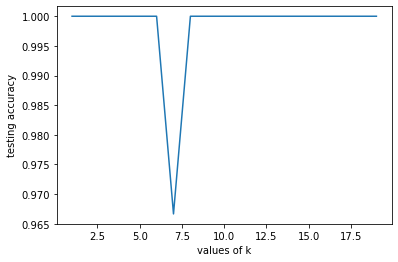

In [75]:
k_range= range(1,20)
scores={}
scores_list=[]
for k in k_range:
  knn= KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred= knn.predict(X_test)
  scores[k]= accuracy_score(y_test, y_pred)
  scores_list.append(accuracy_score(y_test, y_pred))

plt.plot(k_range, scores_list)
plt.xlabel("values of k")
plt.ylabel('testing accuracy')